## Flight Fare Prediction

In [2694]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2695]:
train_data = pd.read_csv('Prog.files/Data_Train.csv')
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [2696]:
test_data = pd.read_csv('Prog.files/Test_set.csv')
test_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


In [2697]:
final_data = pd.concat([train_data, test_data], ignore_index=True)
final_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0


In [2698]:
numeric_features=[feature for feature in final_data.columns if final_data[feature].dtype != 'O']
categorical_features=[feature for feature in final_data.columns if final_data[feature].dtype == 'O']

print(f'We have {len(numeric_features)} numerical features :{numeric_features}')
print(f'We have {len(categorical_features)} categorical features :{categorical_features}')  

We have 1 numerical features :['Price']
We have 10 categorical features :['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']


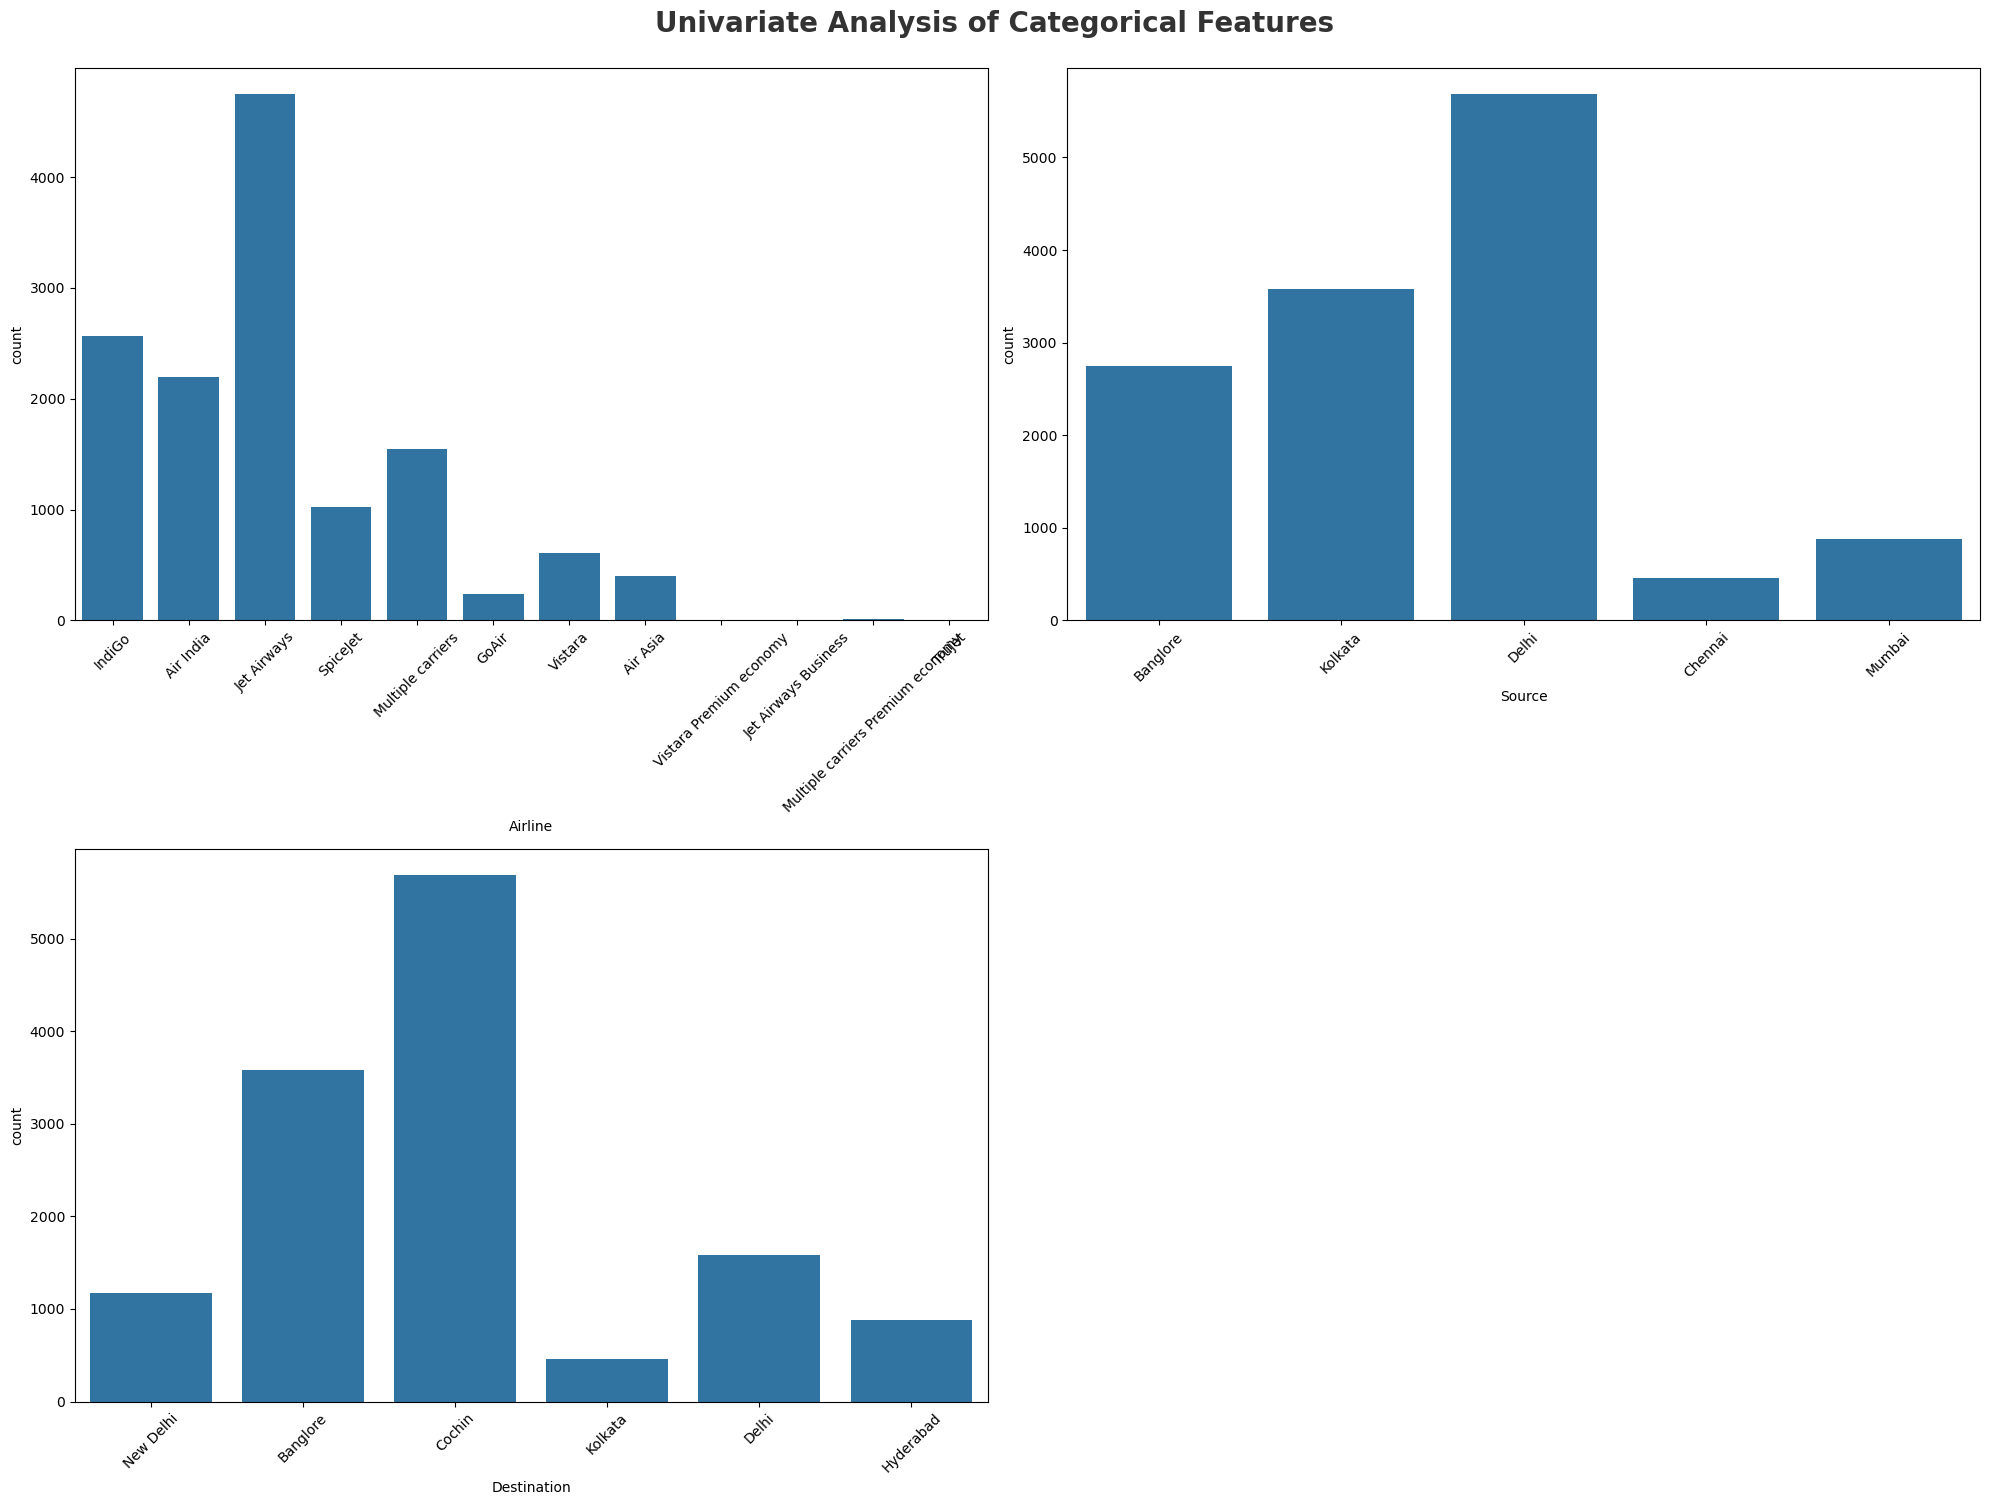

In [2699]:
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'Airline','Source', 'Destination']
for i in range(0, len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=final_data[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [2700]:
from scipy.stats import chi2_contingency
chi2_test=[]
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(final_data['Price'],final_data[feature]))[1] <0.05:
        chi2_test.append('Rejet Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result=pd.DataFrame(data=[categorical_features,chi2_test]).T
result.columns=['Column','Hypothesis Result']
result

,Column,Hypothesis Result
0,Airline,Rejet Null Hypothesis
1,Date_of_Journey,Rejet Null Hypothesis
2,Source,Rejet Null Hypothesis
3,Destination,Rejet Null Hypothesis
4,Route,Rejet Null Hypothesis
5,Dep_Time,Rejet Null Hypothesis
6,Arrival_Time,Rejet Null Hypothesis
7,Duration,Rejet Null Hypothesis
8,Total_Stops,Rejet Null Hypothesis
9,Additional_Info,Rejet Null Hypothesis


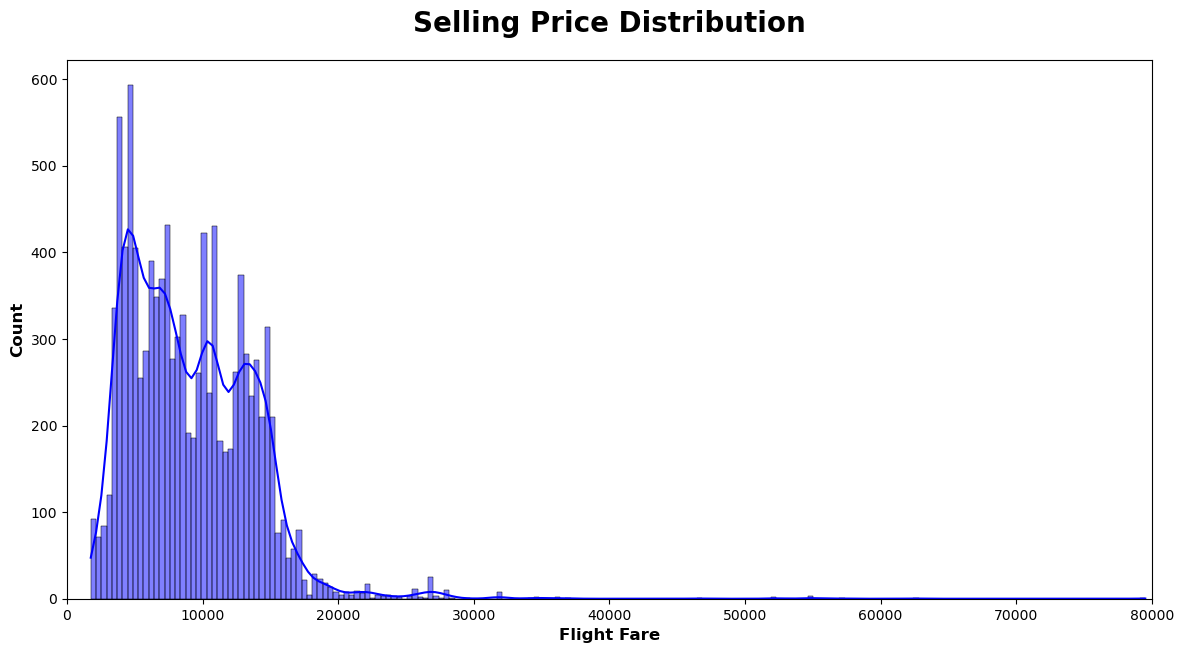

In [2701]:
plt.subplots(figsize=(14,7))
sns.histplot(final_data.Price, bins=200, kde=True, color = 'b')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Flight Fare", weight="bold", fontsize=12)
plt.xlim(0,80000)
plt.show()

In [2702]:
aviation_company_airline = final_data.groupby('Airline').Price.max()
aviation_company= aviation_company_airline.to_frame().sort_values('Price',ascending=False)[0:10]
aviation_company

,Price
Airline,
Jet Airways Business,79512.0
Jet Airways,54826.0
Multiple carriers,36983.0
Air India,31945.0
SpiceJet,23267.0
GoAir,22794.0
IndiGo,22153.0
Vistara,21730.0
Multiple carriers Premium economy,14629.0


C:\Users\Ni\AppData\Local\Temp\ipykernel_7252\316328521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aviation_company_airline.index, y=aviation_company_airline.values,ec = "black",palette="Set2")


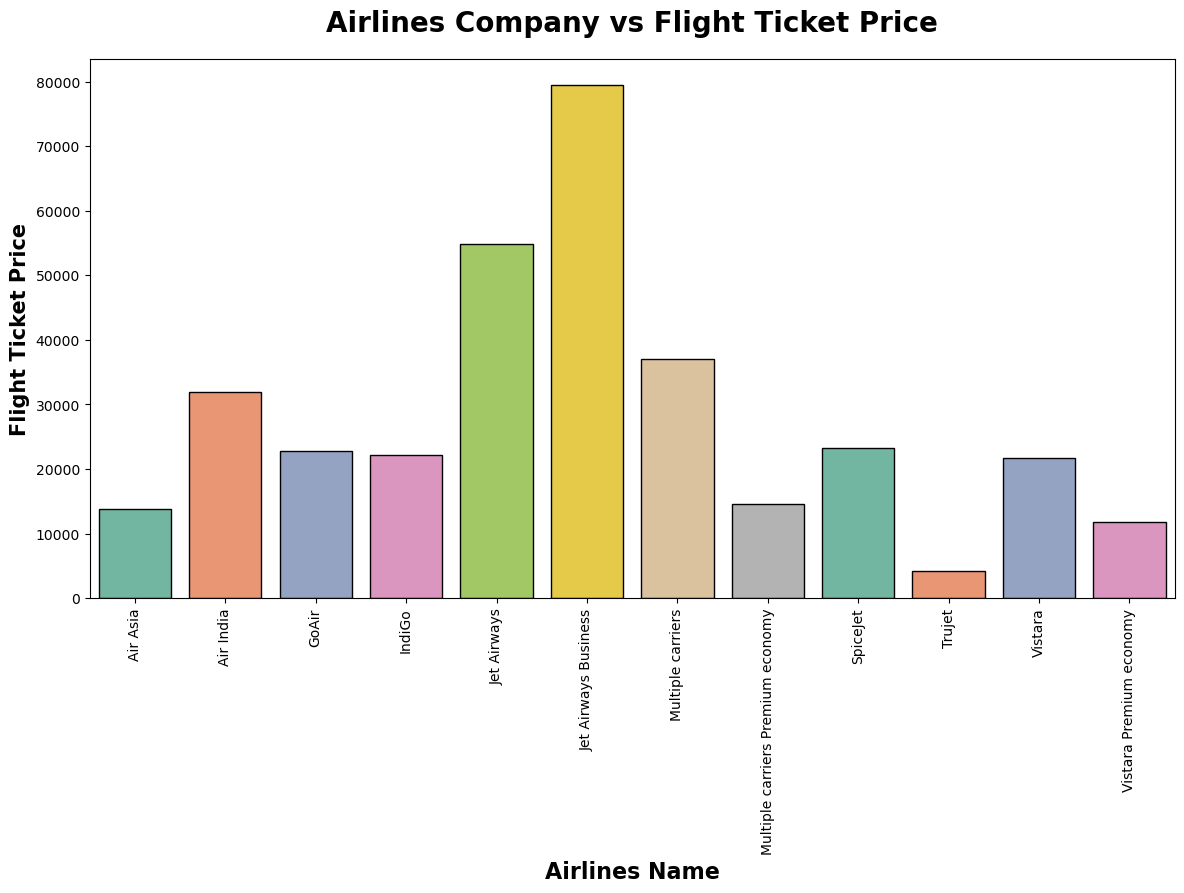

In [2703]:
plt.subplots(figsize=(14,7))
sns.barplot(x=aviation_company_airline.index, y=aviation_company_airline.values,ec = "black",palette="Set2")
plt.title("Airlines Company vs Flight Ticket Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Flight Ticket Price", weight="bold", fontsize=15)
plt.xlabel("Airlines Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

Feature Engineering Process

In [2705]:
final_data['Travel_day'] = pd.to_datetime(final_data["Date_of_Journey"], format= "%d/%m/%Y").dt.day
final_data['Travel_month'] = pd.to_datetime(final_data["Date_of_Journey"], format= "%d/%m/%Y").dt.month
final_data['Travel_year'] = pd.to_datetime(final_data["Date_of_Journey"], format= "%d/%m/%Y").dt.year

In [2706]:
final_data['Travel_day'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13354 entries, 0 to 13353
Series name: Travel_day
Non-Null Count  Dtype
--------------  -----
13354 non-null  int32
dtypes: int32(1)
memory usage: 52.3 KB


In [2707]:
final_data['Arrival_hour']=pd.to_datetime(final_data.Arrival_Time).dt.hour
final_data['Arrival_minute']=pd.to_datetime(final_data.Arrival_Time).dt.minute

C:\Users\Ni\AppData\Local\Temp\ipykernel_7252\1991923805.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_data['Arrival_hour']=pd.to_datetime(final_data.Arrival_Time).dt.hour
C:\Users\Ni\AppData\Local\Temp\ipykernel_7252\1991923805.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_data['Arrival_minute']=pd.to_datetime(final_data.Arrival_Time).dt.minute


In [2708]:
final_data['Dep_hour']=pd.to_datetime(final_data["Dep_Time"]).dt.hour
final_data['Dep_minute']=pd.to_datetime(final_data["Dep_Time"]).dt.minute

C:\Users\Ni\AppData\Local\Temp\ipykernel_7252\1467974496.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_data['Dep_hour']=pd.to_datetime(final_data["Dep_Time"]).dt.hour
C:\Users\Ni\AppData\Local\Temp\ipykernel_7252\1467974496.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_data['Dep_minute']=pd.to_datetime(final_data["Dep_Time"]).dt.minute


In [2709]:
final_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Travel_day,Travel_month,Travel_year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50


In [2711]:
final_data.drop(['Date_of_Journey','Arrival_Time','Dep_Time','Route'],axis=1,inplace=True)

In [2712]:
final_data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Travel_day,Travel_month,Travel_year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50


In [2713]:
final_data['Total_Stops']=final_data['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':2})              


In [2714]:
final_data['H'] = final_data['Duration'].str.split('h').str[0]
final_data['M'] = final_data['Duration'].str.split('h').str[1]
final_data['M'] = final_data['M'].str.split('m').str[0].fillna('0').apply(lambda x: int(x) if x else 0)

In [2715]:
final_data[final_data['H']=='5m']


,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Travel_day,Travel_month,Travel_year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,H,M
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m,0
13343,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m,0


In [2716]:
final_data.drop([6474,13343],axis=0,inplace=True)

In [2717]:
final_data.reset_index(drop=True)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Travel_day,Travel_month,Travel_year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,H,M
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13347,Air India,Kolkata,Banglore,23h 55m,1.0,No info,NaN,6,6,2019,20,25,20,30,23,55
13348,IndiGo,Kolkata,Banglore,2h 35m,0.0,No info,NaN,27,3,2019,16,55,14,20,2,35
13349,Jet Airways,Delhi,Cochin,6h 35m,1.0,No info,NaN,6,3,2019,4,25,21,50,6,35
13350,Air India,Delhi,Cochin,15h 15m,1.0,No info,NaN,6,3,2019,19,15,4,0,15,15


In [2718]:
final_data['H'] = final_data['H'].astype(int)
final_data['H'] = final_data['H']*60
final_data['Duration']=(final_data['H']+final_data['M']).astype(int)

In [2719]:
final_data.drop(['H','M'],axis=1,inplace=True)
final_data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Travel_day,Travel_month,Travel_year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,445,2.0,No info,7662.0,1,5,2019,13,15,5,50


In [2720]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13352 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13352 non-null  object 
 1   Source           13352 non-null  object 
 2   Destination      13352 non-null  object 
 3   Duration         13352 non-null  int32  
 4   Total_Stops      13351 non-null  float64
 5   Additional_Info  13352 non-null  object 
 6   Price            10682 non-null  float64
 7   Travel_day       13352 non-null  int32  
 8   Travel_month     13352 non-null  int32  
 9   Travel_year      13352 non-null  int32  
 10  Arrival_hour     13352 non-null  int32  
 11  Arrival_minute   13352 non-null  int32  
 12  Dep_hour         13352 non-null  int32  
 13  Dep_minute       13352 non-null  int32  
dtypes: float64(2), int32(8), object(4)
memory usage: 1.1+ MB


In [2721]:
final_data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [2722]:
final_data['Destination']=final_data['Destination'].map({'Cochin':'Dest_Cochin','Delhi':'Dest_Delhi','Hyderabad':'Dest_Hyderabad','Kolkata':'Dest_Kolkata','New Delhi':'Dest_New Delhi','Banglore':'Dest_Banglore'}) 

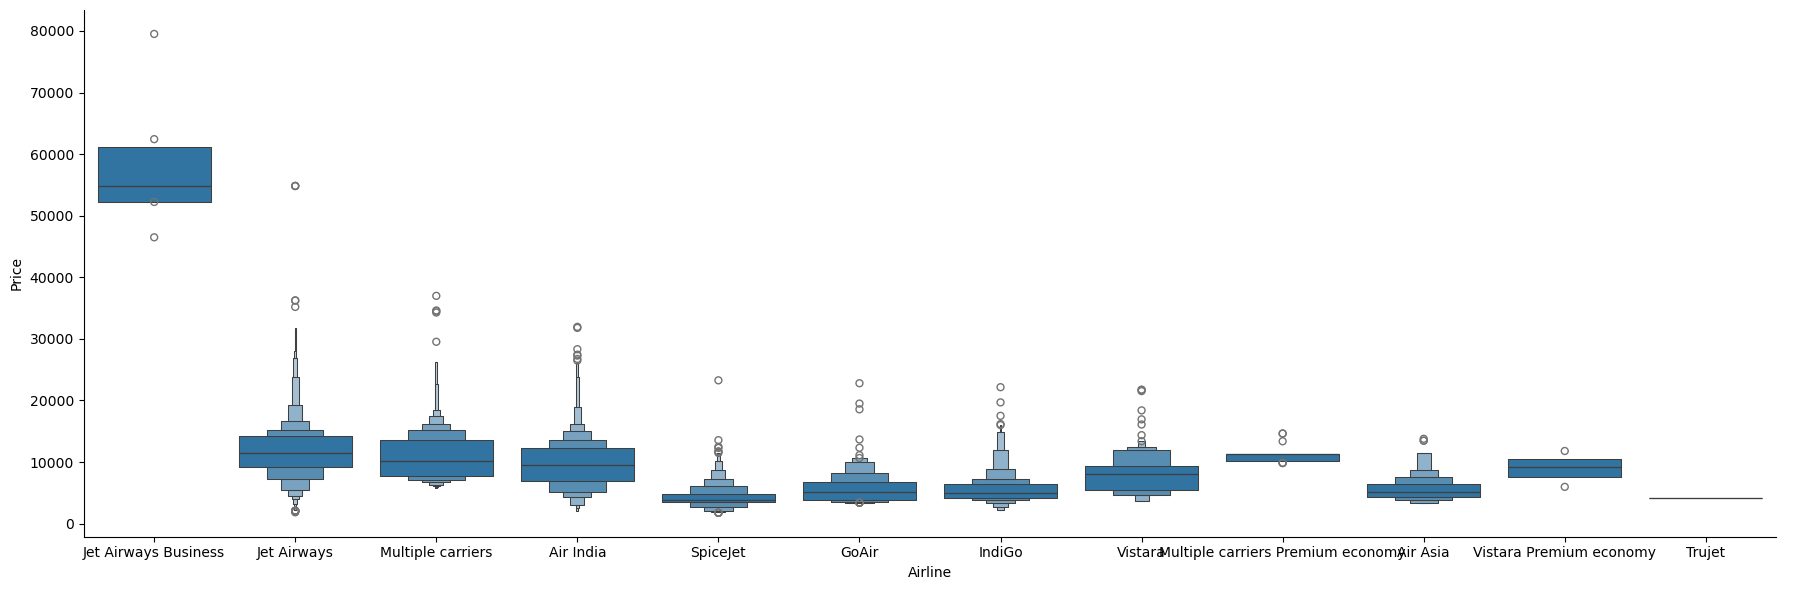

In [2723]:
sns.catplot(y = "Price", x = "Airline", data = final_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [2724]:
#Airline = final_data[["Airline"]]
Airline = pd.get_dummies(final_data['Airline'],drop_first=False).astype(int)
#Source = final_data[["Source"]]
Source = pd.get_dummies(final_data['Source'],drop_first=True).astype(int)
#Destination = final_data[["Destination"]]
Destination = pd.get_dummies(final_data['Destination'], drop_first = True).astype(int)

In [2725]:
data_total=pd.concat([final_data,Airline, Source, Destination],axis=1)
# we have drop the varibles
data_total.drop(["Airline","Source","Destination","Additional_Info"],axis=1,inplace=True)
data_total.head()

,Duration,Total_Stops,Price,Travel_day,Travel_month,Travel_year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,170,0.0,3897.0,24,3,2019,1,10,22,20,...,0,0,0,0,0,0,0,0,0,1
1,445,2.0,7662.0,1,5,2019,13,15,5,50,...,0,0,0,1,0,0,0,0,0,0
2,1140,2.0,13882.0,9,6,2019,4,25,9,25,...,0,0,1,0,0,1,0,0,0,0
3,325,1.0,6218.0,12,5,2019,23,30,18,5,...,0,0,0,1,0,0,0,0,0,0
4,285,1.0,13302.0,1,3,2019,21,35,16,50,...,0,0,0,0,0,0,0,0,0,1


In [2726]:
data_train = data_total.iloc[0:10682,:]
data_train.reset_index(inplace=True)
data_test = data_total.iloc[10682:,:]
data_train.reset_index(inplace=True)

In [2727]:
data_train.dropna(inplace=True)

C:\Users\Ni\AppData\Local\Temp\ipykernel_7252\545998709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.dropna(inplace=True)


In [2728]:
x= data_train.drop(['Price'],axis=1)
y=data_train['Price']
data_test_x = data_test.drop(['Price'],axis=1)

In [2729]:
'''x= data_train[['Total_Stops', 'Date', 'Month','Year', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute',
       'Duration', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Dest_Cochin', 'Dest_Delhi', 'Dest_Hyderabad',
       'Dest_Kolkata', 'Dest_New Delhi']]'''

"x= data_train[['Total_Stops', 'Date', 'Month','Year', 'Dep_hour',\n       'Dep_minute', 'Arrival_hour', 'Arrival_minute',\n       'Duration', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',\n       'Jet Airways Business', 'Multiple carriers',\n       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',\n       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',\n       'Dest_Cochin', 'Dest_Delhi', 'Dest_Hyderabad',\n       'Dest_Kolkata', 'Dest_New Delhi']]"

In [2730]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

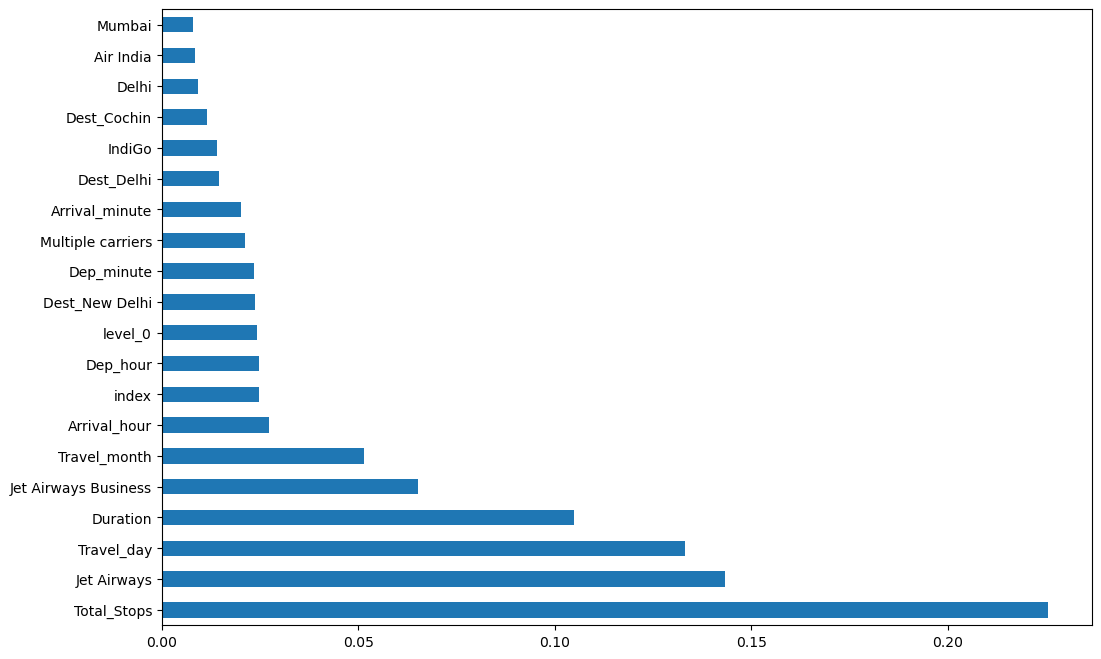

In [2731]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [2732]:
# import library
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#Deifne feature selection
fs=SelectKBest(score_func=chi2)  
# Applying feature selection
X_selected=fs.fit(x,y)

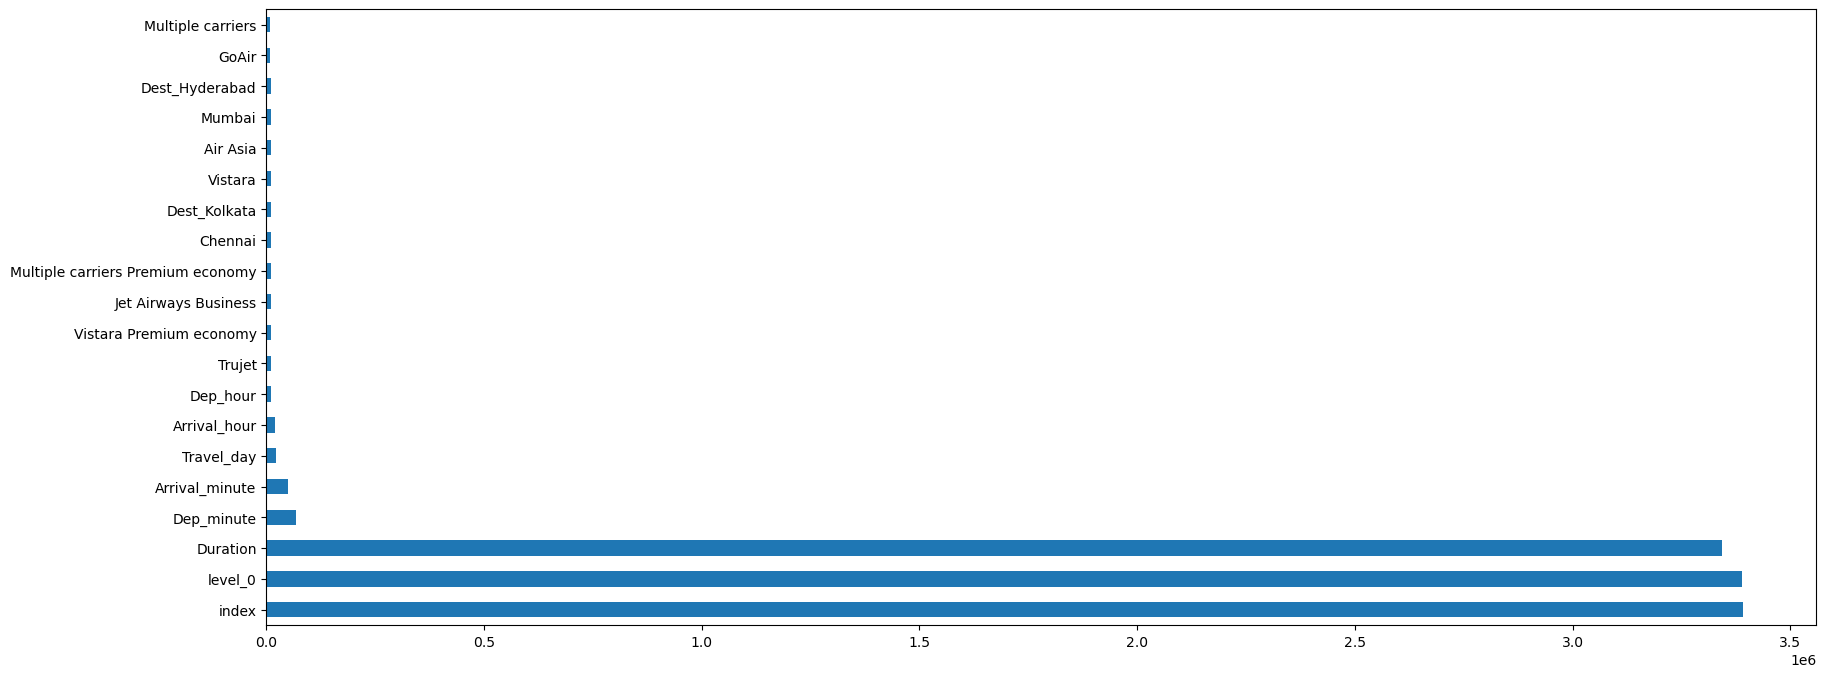

In [2733]:
plt.figure(figsize=(20,8))
feat_importances = pd.Series(X_selected.scores_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [2734]:
#Splitting the Data into Train & Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=32)

In [2735]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor()

In [2736]:
random_forest.fit(x_train,y_train)

RandomForestRegressor()

In [2737]:
random_forest.score(x_test,y_test)

0.8450683333081774

In [2738]:
random_forest.score(x_train,y_train)

0.9751137417959902

In [2739]:
y_pred_1=random_forest.predict(x_test)

C:\Users\Ni\AppData\Local\Temp\ipykernel_7252\2681230530.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred_1,kde=True)


<Axes: xlabel='Price', ylabel='Density'>

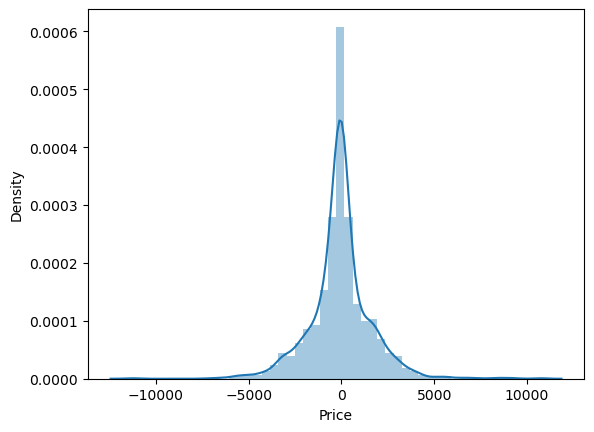

In [2740]:
#Plotting the error graph and should be mean=0
sns.distplot(y_test-y_pred_1,kde=True)

In [2741]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_1)))

MAE: 1103.8300112317484
MSE: 2872812.1337505807
RMSE: 1694.9372064329052


Text(0, 0.5, 'y_prediction_1')

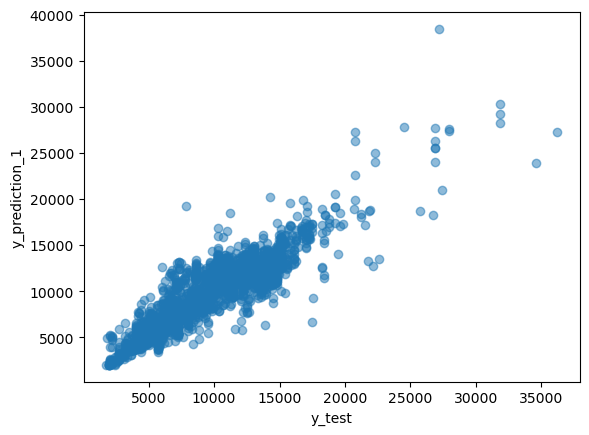

In [2742]:
#Plotting scatter graph to check linear relations
plt.scatter(y_test,y_pred_1,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_prediction_1')

In [2743]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 8)]
min_samples_split = [2, 5, 10, 15, 100, 120, 150, 200, 250]
min_samples_leaf = [1, 2, 5, 10,15,25,30,35]

In [2744]:
random_grid_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [2835]:
random_forest_regresor=RandomForestRegressor(n_estimators=300,
min_samples_split= 10,
min_samples_leaf= 2,
max_features= 32,
max_depth= 15)

In [2839]:
random_forest_regresor.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, max_features=32, min_samples_leaf=2,
                      min_samples_split=10, n_estimators=300)

In [2840]:
random_forest_regresor.score(x_train,y_train)

0.9077563967941418

In [2841]:
random_forest_regresor.score(x_test,y_test)

0.8525626757790513

In [2845]:
y_pred_2=random_forest_regresor.predict(x_test)

C:\Users\Ni\AppData\Local\Temp\ipykernel_7252\4064215402.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred_2,kde=True)


<Axes: xlabel='Price', ylabel='Density'>

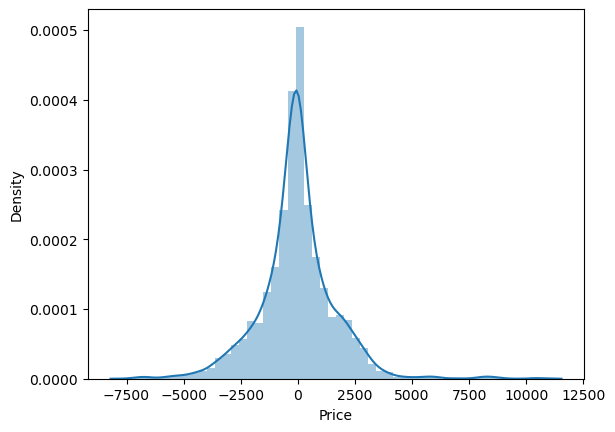

In [2847]:
sns.distplot(y_test-y_pred_2,kde=True)

Text(0, 0.5, 'y_prediction_2')

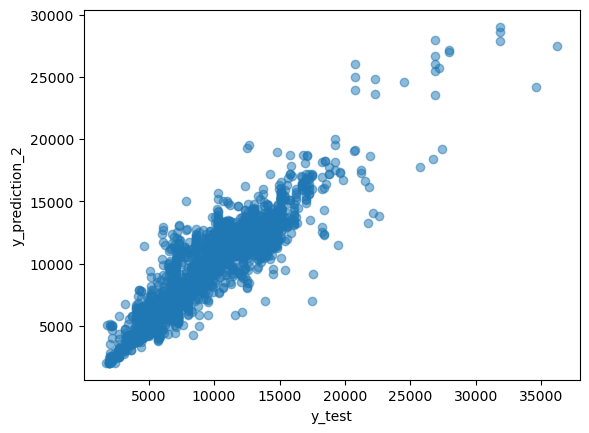

In [2849]:
plt.scatter(y_test,y_pred_2,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_prediction_2')

In [2851]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_2)))

MAE: 1119.030377383856
MSE: 2733848.6897721845
RMSE: 1653.4354205024715


In [2853]:
import pickle
file = open('flight_fare_pred.pkl', 'wb')
pickle.dump(random_forest_regresor, file)

In [2855]:
model = open('flight_fare_pred.pkl','rb')
flight_fare_pedictor = pickle.load(model)

In [2857]:
flight_fare_pedictor.score(x_test,y_test)

0.8525626757790513

In [2863]:
from sklearn import metrics
print(metrics.r2_score(y_test,y_pred_1))
metrics.r2_score(y_test,y_pred_2)

0.8450683333081774


0.8525626757790513

In [2865]:
y_p=flight_fare_pedictor.predict(x_test)